In [1]:
import urllib.request
import os
import numpy as np
import gzip

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urllib.request.urlretrieve(source + filename, filename)

def load_mnist_images(filename):
#     if not os.path.exists(filename):
#         download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 1, 28, 28).transpose(0,1,3,2)
    data = np.asarray([np.rot90(np.fliplr(x[0])) for x in data])
    data = data.reshape(-1, 1, 28, 28)
    return data / np.float32(255)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

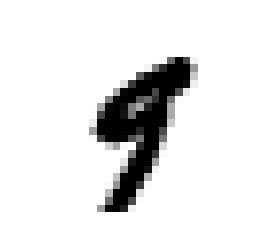

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# shuffle the training set; this will guarantee that all cross-validation folds will be similar
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## train a binary classifier to identify digit 5

In [6]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=43)
sgd_clf.fit(X_train, y_train_5)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=43, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([0.96775, 0.96635, 0.9476 ])

In this case, even a dumb classifier that predicts every digit as 5 will have over 90% accuracy. Here the use of accuracy is not a good metric for measuring performance. Let's look at the confusion matrix.

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([[53895,   684],
       [ 1682,  3739]], dtype=int64)

In [10]:
# precision and recalls
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5, y_train_pred)) # == 4364 / (4364 + 843)
print(recall_score(y_train_5, y_train_pred)) # == 4364 / (4364 + 1057)
print(f1_score(y_train_5, y_train_pred))

0.8453538322405607
0.689725142962553
0.759650548557497


In [11]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

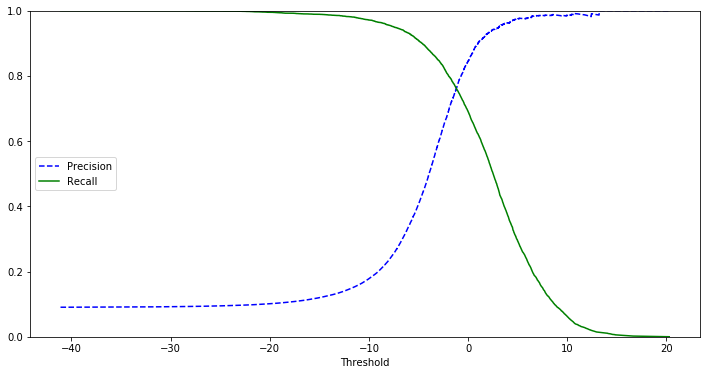

In [12]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plt.rcParams["figure.figsize"] = (12, 6)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

As you can see, the best threshold is around 0 that maximizes both precision and recall at the same time. 

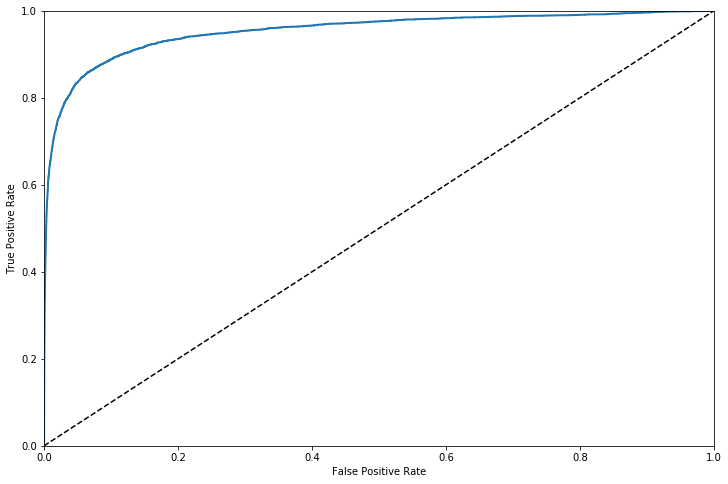

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.rcParams["figure.figsize"] = (12, 8)
plot_roc_curve(fpr, tpr)
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9538051321581787

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=43)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

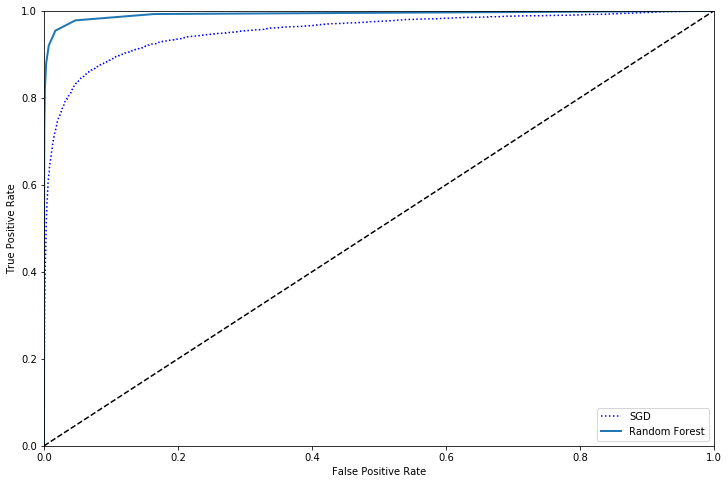

In [16]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [17]:
roc_auc_score(y_train_5, y_scores_forest)

0.9926624218216724

## Multiclass Classification

In [18]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([9], dtype=uint8)

In [19]:
# default to OvA classification
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores # highest score corresponds to digit 4

array([[-43.2996971 , -10.86852882, -21.22932812,  -2.86778955,
         -1.50788138,  -4.09122488, -17.68750024,  -8.37258505,
         -9.60180042,  -1.14766765]])

In [20]:
# force to use OvO strategy
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([9], dtype=uint8)

It is quite interesting as the prediction turns out to be different under the two strategies.

In [21]:
# try a random forest classifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

In [22]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0.9]])

In [23]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([0.88467307, 0.84914246, 0.89243387])

In [24]:
# scale the input and retrain
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([0.90996801, 0.91044552, 0.91088663])

A significant increase in accuracy can be achieved by simply scaling the inputs.

## Error Analysis

In [25]:
# by looking at the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([[5734,    3,   26,   11,   10,   46,   41,    9,   40,    3],
       [   2, 6486,   43,   24,    4,   39,    7,   14,  111,   12],
       [  51,   38, 5323,   93,   80,   24,  100,   62,  173,   14],
       [  51,   38,  136, 5344,    1,  240,   31,   53,  147,   90],
       [  24,   30,   38,   11, 5354,    9,   50,   34,   76,  216],
       [  65,   41,   33,  176,   71, 4604,  112,   27,  189,  103],
       [  32,   24,   45,    2,   41,   92, 5628,    7,   46,    1],
       [  28,   19,   68,   25,   52,   11,    3, 5806,   16,  237],
       [  49,  156,   70,  138,   14,  145,   56,   29, 5060,  134],
       [  42,   31,   27,   83,  159,   35,    3,  202,   80, 5287]],
      dtype=int64)

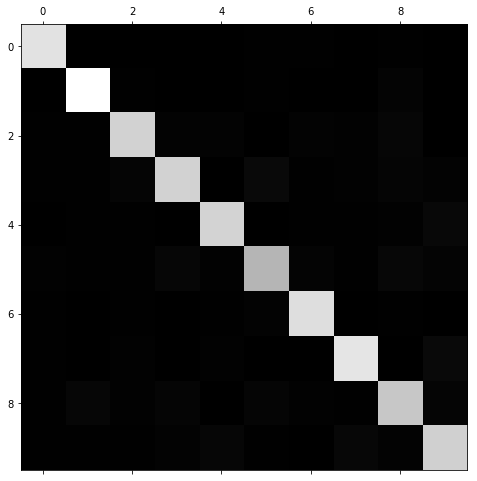

In [26]:
# convert the confusion matrix to an image
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Brightness on the diagonal indicates that most images are classified correctly. Notice that the 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits.

In [27]:
# divide each value in the confusion matrix by the number of images in the corresponding class
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

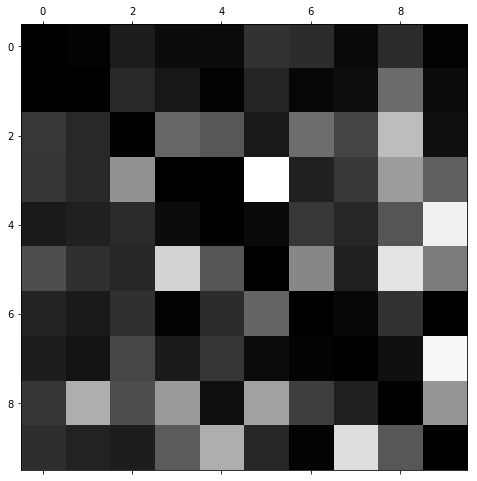

In [28]:
# fill the diagonal with 0s and display only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Remember that rows represent actual classes, while columns represent predicted classes. The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as 8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused with other digits. Conversely, some rows are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for example, there are more 5s misclassified as 8s than the reverse.

## Multilabel Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [31]:
# # measure the F1 score for each label and average among the labels
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")

## Exercise

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [32]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}
# knn = KNeighborsClassifier()
# clf = GridSearchCV(knn, parameters, scoring='accuracy', n_jobs=-1, verbose=3, cv=5)
# clf.fit(X_train, y_train)

In [33]:
# clf.best_params_

In [34]:
# clf.best_score_

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [35]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], cval=0)
    return shifted_image.reshape([-1])

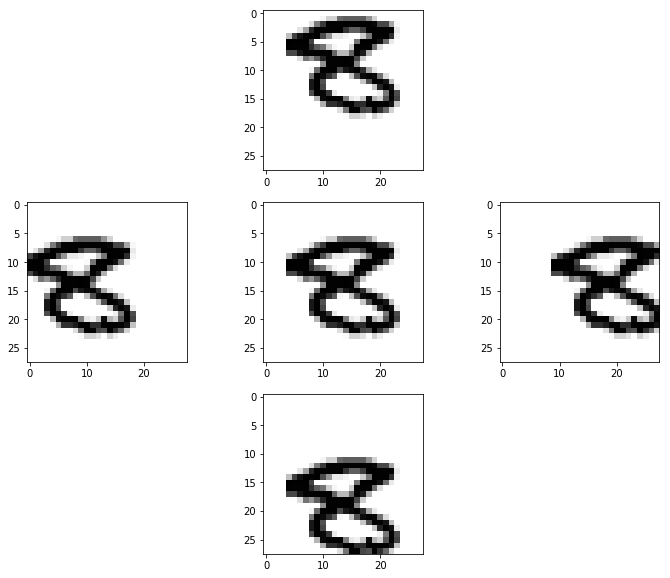

In [36]:
# verify the shift_image utility by visualizing some images
image = X_train[1000]
shifted_image_up = shift_image(image, -5, 0)
shifted_image_down = shift_image(image, 5, 0)
shifted_image_left = shift_image(image, 0, -5)
shifted_image_right = shift_image(image, 0, 5)

grids = {
    2: shifted_image_up,
    4: shifted_image_left,
    5: image,
    6: shifted_image_right,
    8: shifted_image_down
}

plt.figure(figsize=(12,10))
for loc in grids:
    plt.subplot(3, 3, loc)
#     plt.title("Original", fontsize=14)
    plt.imshow(grids[loc].reshape(28, 28), interpolation="nearest", cmap=matplotlib.cm.binary)
#     plt.axis("off")
plt.show()

Tackle the Titanic dataset. A great place to start is on Kaggle.

In [267]:
# load the Titanic data
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [271]:
raw = train.append(test, ignore_index=True)
raw.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [229]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
raw['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabins with the same first letter usually locate in the same area. However, there are too many missing values to make this attribute useful.

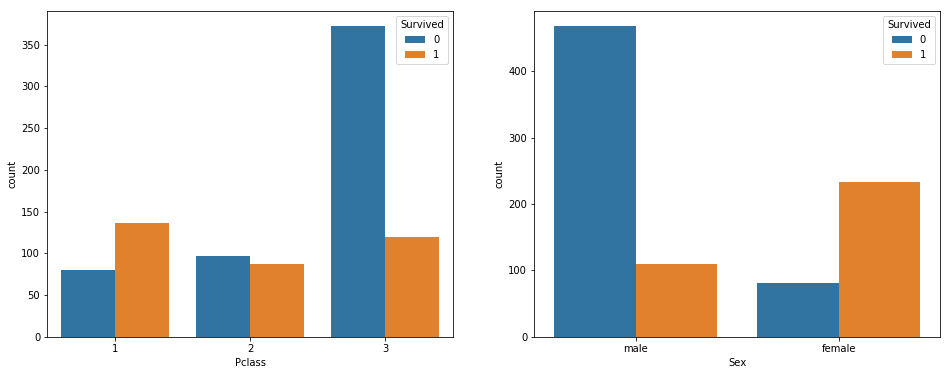

In [41]:
# visualize some of the attributes
import seaborn as sns

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.countplot("Pclass", hue="Survived", data=raw)
plt.subplot(122)
sns.countplot("Sex", hue="Survived", data=raw)

This is somehow what we expected: the higher the socio-economic status of the passengers, higher the probability were they survived from the disaster. And females were much more likely to survive.

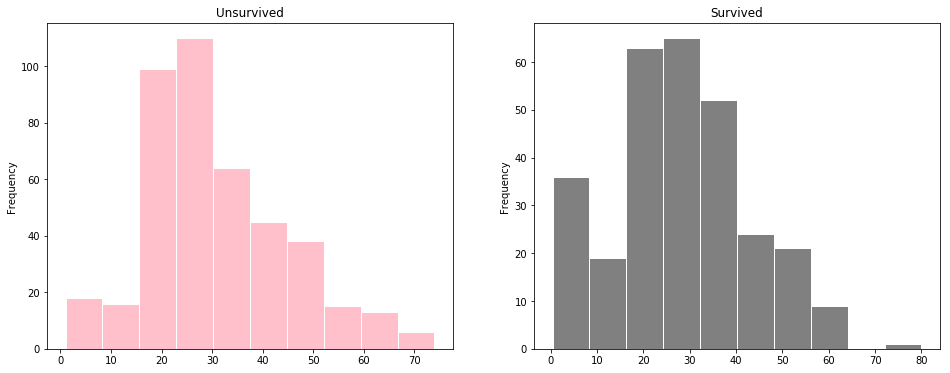

In [42]:
# let's explore a bit more on the distribution of the age
plt.figure(figsize=(16, 6))
plt.subplot(121)
raw[raw['Survived'] == 0]['Age'].plot.hist(edgecolor='white', color='pink', title='Unsurvived')
plt.subplot(122)
raw[raw['Survived'] == 1]['Age'].plot.hist(edgecolor='white', color='grey', title='Survived')

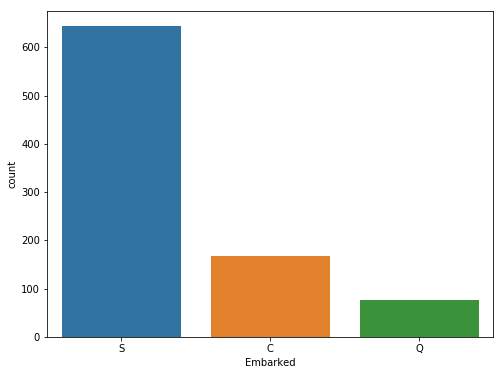

In [43]:
# take a peek in the "Embarked" attribute
plt.figure(figsize=(8, 6))
sns.countplot("Embarked", data=raw)

We can clearly see that most passengers embarked at "S" (Southampton).

## Data Cleaning

The first round of data cleaning is quick and dirty: I'll drop the PassengerId, Name, Ticket and Cabin attributed, impute the missing age values using the median age, and encode the categorical attributes using one-hot encoder.

In [272]:
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

class OneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        return pd.get_dummies(X).values
    
class RegPredictor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        train = X
        train["Sex"].replace(["male", "female"], [0, 1], inplace=True)
        train, reg = self.assign_missing_ages(train)
        train["Age"] = train["Age"].astype(int)
        return train[['Age', 'Sex']]
    @staticmethod
    def assign_missing_ages(data_frame, regressor='rfr'):
        known_ages = data_frame[data_frame.Age.notnull()].as_matrix()
        unknown_ages = data_frame[data_frame.Age.isnull()].as_matrix()

        # Create target and eigenvalues for known ages
        target = known_ages[:, 0]
        eigen_val = known_ages[:, 1:]

        # apply the regressor
        if regressor == 'rfr':
            reg = RandomForestRegressor(random_state = 43, n_estimators = 2000, n_jobs = -1)
        else:
            reg = LinearRegression(n_jobs = -1)
        reg.fit(eigen_val, target)

        # predictions
        Age_predictions = reg.predict(unknown_ages[:, 1::])
        data_frame.loc[(data_frame.Age.isnull()), "Age"] = Age_predictions

        return data_frame, reg

As the first-round predictions didn't come out well, I'm experimenting some other approaches to fill in the missing age values. Here I use regression models to predict the missing age values based on other attributes. I use both linear regression and RFR to predict and compare the results.

Predicting missing age values slighted improved the scoring. Now I try to impute ages using mean ages grouped by sex, class and passengers' title.

In [273]:
# create a new feature to extract title names from the Name column
raw['Title'] = raw['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [274]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

# map the normalized titles to the current titles 
raw['Title'] = raw['Title'].map(normalized_titles)
# view value counts for the normalized titles
print(raw['Title'].value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [275]:
# group by Sex, Pclass, and Title 
grouped = raw.groupby(['Sex', 'Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [276]:
# apply the grouped median value on the Age NaN
raw['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))

In [279]:
from future_encoders import ColumnTransformer

num_attribs = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Embarked', 'Sex']

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy='median')),
        ('scaler', MinMaxScaler()),
    ])

age_pipeline = Pipeline([
        ('reg_predictor', RegPredictor()),
        ('scaler', MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ("1hot_encoder", OneHotEncoder()),
        ('imputer', Imputer(strategy='most_frequent')),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
#         ("age", age_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X = full_pipeline.fit_transform(raw)

In [280]:
X[0]

array([0.27345609, 1.        , 0.125     , 0.        , 0.01415106,
       0.        , 0.        , 1.        , 0.        , 1.        ])

In [281]:
X.shape

(1309, 10)

In [282]:
X_train = X[:891]
y_train = raw[:891]['Survived']
X_test = X[891:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 10)
(891,)
(418, 10)


## Select and train a model

In [140]:
# an SGD classifier
sgd_clf = SGDClassifier(random_state=43)
sgd_clf.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=43, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [141]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

array([0.75977654, 0.77094972, 0.78651685, 0.78089888, 0.65536723])

In [142]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=5, method="decision_function")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\lib\

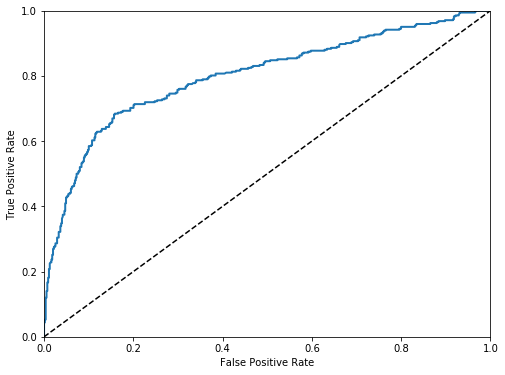

In [143]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.rcParams["figure.figsize"] = (8, 6)
plot_roc_curve(fpr, tpr)
plt.show()

In [144]:
roc_auc_score(y_train, y_scores)

0.7995025511562757

In [283]:
# a random forest classifier
forest_clf = RandomForestClassifier(random_state=43)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5, method="predict_proba")

In [284]:
cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.77094972, 0.77653631, 0.79775281, 0.7752809 , 0.84180791])

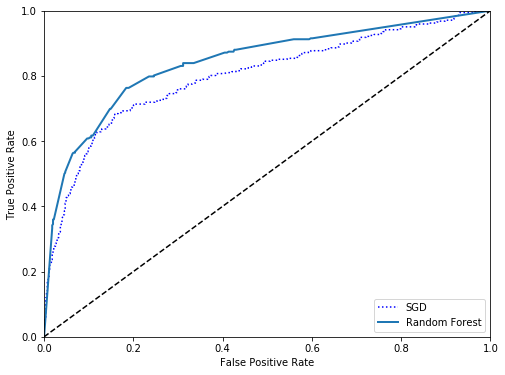

In [285]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train ,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [286]:
roc_auc_score(y_train, y_scores_forest)

0.8423529223788067

In [287]:
# a support vector classifier
from sklearn.svm import SVC
svc_clf = SVC(random_state=43)
svc_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=43, shrinking=True,
  tol=0.001, verbose=False)

In [288]:
cross_val_score(svc_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.80446927, 0.80446927, 0.78651685, 0.75280899, 0.78531073])

The SVC model achieves better accuracy than the other two with default parameters. Let's grid search to find the best parameters for SVC.

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4], 'C': [1e4, 1e5, 1e6]}]

# scores = ['accuracy', 'precision_macro', 'recall_macro']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100000.0, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.813 (+/-0.034) for {'C': 10000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.788 (+/-0.040) for {'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.788 (+/-0.040) for {'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}
0.824 (+/-0.042) for {'C': 100000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.802 (+/-0.026) for {'C': 100000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.787 (+/-0.038) for {'C': 100000.0, 'gamma': 0.0001, 'kernel': 'rbf'}
0.823 (+/-0.050) for {'C': 1000000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.818 (+/-0.043) for {'C': 1000000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.791 (+/-0.051) for {'C': 1000000.0, 'gamma': 0.0001, 'kernel': 'rbf'}



In [245]:
scv_clf = SVC(C=1e5, gamma=1e-2, kernel='rbf')
cross_val_score(scv_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.82122905, 0.82122905, 0.8258427 , 0.79213483, 0.85875706])

In [246]:
y_scores_svc = cross_val_predict(scv_clf, X_train, y_train, cv=5, method="decision_function")

In [247]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, y_scores_svc)

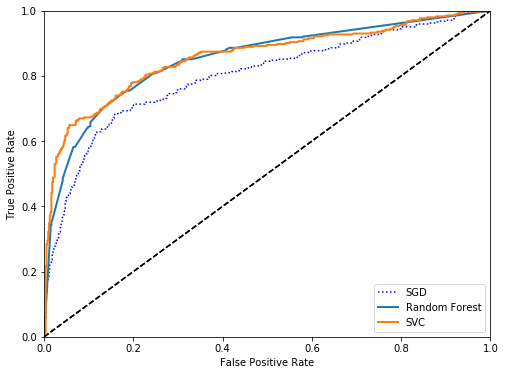

In [248]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.legend(loc="lower right")
plt.show()

The SVC and random forest classifiers get similar performance, whereas both significantly outperformed the SGD classifier. Let's transform the test set and make predictions.

In [293]:
forest_clf.fit(X_train, y_train)
predicted_labels = forest_clf.predict(X_test).astype(int)

In [294]:
predicted_labels.shape

(418,)

In [295]:
submission = pd.concat([titanic_test['PassengerId'],
                        pd.DataFrame(data=predicted_labels, columns=['Survived'])],
                       axis=1)

In [296]:
submission.to_csv('submission.csv', index=False)